**Proyek: Analisis Eksplorasi Data (EDA) pada Dataset Penjualan Real Estate**


**Tujuan:**
Anda adalah seorang analis data di sebuah perusahaan properti. Anda diberi dataset penjualan rumah dan diminta untuk melakukan analisis eksplorasi untuk memahami faktor-faktor apa saja yang memengaruhi harga properti dan menemukan pola penjualan yang menarik.

---

**Load Dataset**

**1: Pemuatan dan Eksplorasi Awal**

- Muat dataset ke dalam DataFrame pandas.
- Gunakan .head(), .info(), dan .describe() untuk mendapatkan gambaran umum data. Identifikasi kolom mana yang memiliki tipe data yang salah atau data yang hilang.

In [12]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("subhiarjaria09/real-estate-property-transactions-dataset")

print("Path to dataset files:", path)


# Cek file apa saja yang ada di folder dataset
print(os.listdir(path))


Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\subhiarjaria09\real-estate-property-transactions-dataset\versions\1
['V3.csv']


In [13]:
file_path = os.path.join(path, "V3.csv")

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

real_estate_trans_df = pd.read_csv(file_path)

***muat dataset ke dataframe***

In [15]:
print('Dataset_penjualan Real estate')
real_estate_trans_df.head()

Dataset_penjualan Real estate


,Date,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Face
0,2009-01-02,2009,Waterbury,111440.0,185000.0,Single Family,Detached House,3,3,996.0,1.025953,South
1,2009-01-02,2009,NaN,73080.0,152000.0,Single Family,Detached House,3,1,935.0,1.025953,North
2,2009-01-02,2009,Waterbury,50540.0,105000.0,Single Family,Detached House,3,1,951.0,1.025953,East
3,2009-01-02,2009,Norwalk,571060.0,1000000.0,Single Family,Detached House,3,2,NaN,1.025953,South
4,2009-01-02,2009,Bridgeport,4775276.0,272900.0,Single Family,Detached House,3,1,971.0,1.025953,East


***get an overview***

In [16]:
real_estate_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   Year               10000 non-null  int64  
 2   Locality           8745 non-null   object 
 3   Estimated Value    8771 non-null   float64
 4   Sale Price         10000 non-null  float64
 5   Property           10000 non-null  object 
 6   Residential        10000 non-null  object 
 7   num_rooms          10000 non-null  int64  
 8   num_bathrooms      10000 non-null  int64  
 9   carpet_area        8718 non-null   float64
 10  property_tax_rate  10000 non-null  float64
 11  Face               10000 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 937.6+ KB


In [17]:
real_estate_trans_df.describe()

,Year,Estimated Value,Sale Price,num_rooms,num_bathrooms,carpet_area,property_tax_rate
count,10000.000000,8.771000e+03,1.000000e+04,10000.000000,10000.000000,8718.000000,10000.000000
mean,2015.880100,4.445842e+05,6.224748e+05,3.329600,2.334000,1111.658981,1.143517
std,4.088031,7.513565e+05,1.029709e+06,0.885123,1.209293,305.058455,0.166762
min,2009.000000,0.000000e+00,2.000000e+03,3.000000,1.000000,900.000000,1.003979
25%,2012.000000,1.305250e+05,1.600000e+05,3.000000,1.000000,960.000000,1.023495
50%,2016.000000,2.431800e+05,3.400000e+05,3.000000,2.000000,1021.000000,1.025899
75%,2019.000000,4.418300e+05,6.300000e+05,3.000000,3.000000,1082.000000,1.348259
max,2022.000000,2.111991e+07,2.575000e+07,8.000000,8.000000,2989.000000,1.422308


---

**2: Pembersihan dan Validasi Data**

- Tangani Data Hilang: Lakukan imputasi untuk kolom Jumlah Kamar Tidur yang hilang. Pilihlah antara median atau modus dan berikan alasan Anda.
- Konversi Tipe Data: Ubah kolom Tanggal Penjualan dari object menjadi datetime. Ubah Jumlah Kamar Tidur menjadi int.
- Identifikasi Outlier: Gunakan box plot untuk memeriksa outlier pada kolom Harga (USD) dan Luas Bangunan (m2). Analisis outlier tersebut, apakah perlu dihapus atau dipertahankan? Jelaskan keputusan Anda.

***tangani data yang hilang***

In [30]:
# buat kolom kamar tidur anggap  pengurangan ruangan dan kamar mandi menghasilkan kamar tidur
# jika ada nilai yang 0 anggap itu missing value
real_estate_trans_df['num_bedrooms'] = real_estate_trans_df['num_rooms'] - real_estate_trans_df['num_bathrooms']

print(real_estate_trans_df.head())

         Date  Year    Locality  Estimated Value  Sale Price       Property  \
0  2009-01-02  2009   Waterbury         111440.0    185000.0  Single Family   
1  2009-01-02  2009         NaN          73080.0    152000.0  Single Family   
2  2009-01-02  2009   Waterbury          50540.0    105000.0  Single Family   
3  2009-01-02  2009     Norwalk         571060.0   1000000.0  Single Family   
4  2009-01-02  2009  Bridgeport        4775276.0    272900.0  Single Family   

      Residential  num_rooms  num_bathrooms  carpet_area  property_tax_rate  \
0  Detached House          3              3        996.0           1.025953   
1  Detached House          3              1        935.0           1.025953   
2  Detached House          3              1        951.0           1.025953   
3  Detached House          3              2          NaN           1.025953   
4  Detached House          3              1        971.0           1.025953   

    Face  num_bedrooms  
0  South             0  


In [31]:
# cek outlier dengan IQR
Q1 = real_estate_trans_df['num_bedrooms'].quantile(0.25)
Q3 = real_estate_trans_df['num_bedrooms'].quantile(0.75)

IQR = Q3 -  Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 - 1.5 * IQR

outlier = real_estate_trans_df[(real_estate_trans_df['num_bedrooms'] < lower_bound) | (real_estate_trans_df['num_bedrooms'] > upper_bound)]

print('\nOutlier num_bedrooms yang terdeteksi dengan IQR:')
print(outlier['num_bedrooms'])


Outlier num_bedrooms yang terdeteksi dengan IQR:
0       0
1       2
2       2
3       1
4       2
       ..
9995    1
9996    0
9997    2
9998    1
9999    2
Name: num_bedrooms, Length: 10000, dtype: int64


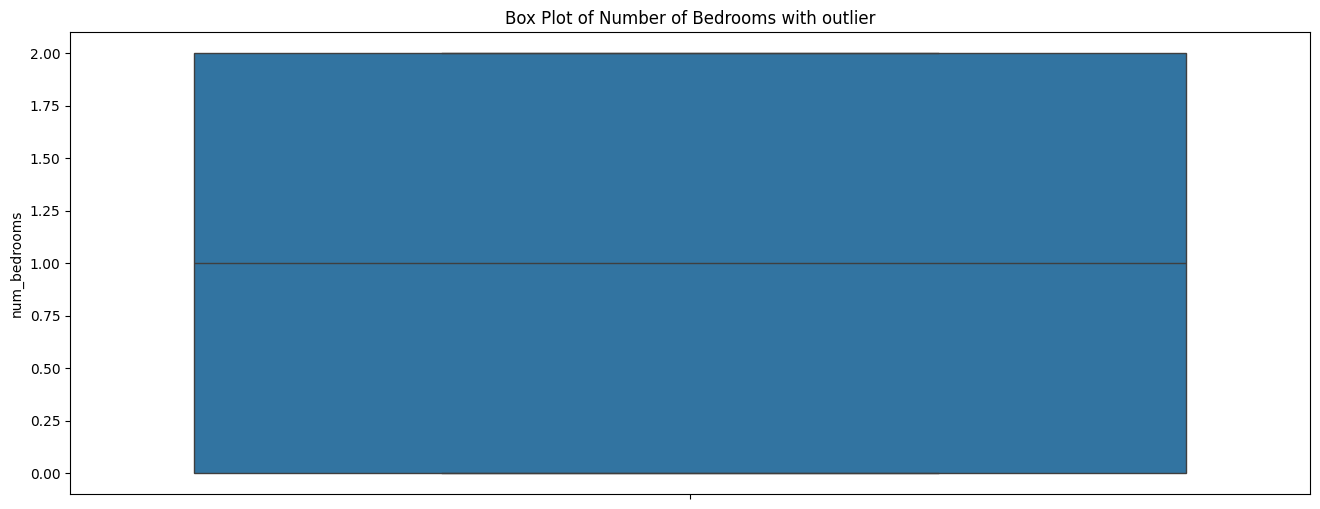

In [33]:
# lihat dengan boxplot agar lebih enak

plt.figure(figsize=(16, 6))
sns.boxplot(data=real_estate_trans_df, y='num_bedrooms')
plt.title('Box Plot of Number of Bedrooms with outlier')
plt.show()

In [42]:
print(real_estate_trans_df['num_bedrooms'].mean())

0.9956


- tidak terdeteksi outlier nilai cenderung antara 0 sampai 2 oleh karena itu kita bisa menggunakan nilai mean untuk mengisi
missing value ini sangat aman tetapi pada saat di hitung meannya ada di kisaran 0.9956 yang menyebabkan missing values akan terisi
dengan 0 kembali jadi saya akan mengisi dengan mode saja.

In [51]:
# imputation missing value dengan mode
import numpy as np

mode_value = real_estate_trans_df['num_bedrooms'].replace(0, np.nan).mode()[0]
real_estate_trans_df['num_bedrooms'] = real_estate_trans_df['num_bedrooms'].fillna(mode_value)

# pastikan integer
real_estate_trans_df['num_bedrooms'] = real_estate_trans_df['num_bedrooms'].astype(int)


In [53]:
print(real_estate_trans_df.dtypes)

Date                  object
Year                   int64
Locality              object
Estimated Value      float64
Sale Price           float64
Property              object
Residential           object
num_rooms              int64
num_bathrooms          int64
carpet_area          float64
property_tax_rate    float64
Face                  object
num_bedrooms           int32
dtype: object


In [52]:
real_estate_trans_df.head(20)

,Date,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Face,num_bedrooms
0,2009-01-02,2009,Waterbury,111440.0,185000.0,Single Family,Detached House,3,3,996.0,1.025953,South,2
1,2009-01-02,2009,NaN,73080.0,152000.0,Single Family,Detached House,3,1,935.0,1.025953,North,2
2,2009-01-02,2009,Waterbury,50540.0,105000.0,Single Family,Detached House,3,1,951.0,1.025953,East,2
3,2009-01-02,2009,Norwalk,571060.0,1000000.0,Single Family,Detached House,3,2,NaN,1.025953,South,1
4,2009-01-02,2009,Bridgeport,4775276.0,272900.0,Single Family,Detached House,3,1,971.0,1.025953,East,2
5,2009-01-02,2009,Greenwich,NaN,5187000.0,?,Detached House,3,2,1026.0,1.025953,South,1
6,2009-01-03,2009,Norwalk,NaN,1340000.0,Single Family,Detached House,3,1,936.0,1.025953,North,2
7,2009-01-03,2009,Norwalk,172620.0,409000.0,?,Detached House,3,3,1004.0,1.025953,South,2
8,2009-01-04,2009,Bridgeport,NaN,410000.0,Two Family,Duplex,4,3,1498.0,1.025953,West,1
9,2009-01-04,2009,Waterbury,NaN,176000.0,?,Detached House,3,1,1008.0,1.025953,North,2


***additional mengisi seluruh missing value dari semua kolom yang mempunya missing value agar lebih clean***

In [55]:
real_estate_trans_df.isna().sum()

Date                    0
Year                    0
Locality             1255
Estimated Value      1229
Sale Price              0
Property                0
Residential             0
num_rooms               0
num_bathrooms           0
carpet_area          1282
property_tax_rate       0
Face                    0
num_bedrooms            0
dtype: int64

In [ ]:

persentase_missing_values = 